In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
cities = ['ABZ', 'ALE', 'AMA', 'AMM', 'ASP', 'BEI', 'BOT', 'BSL', 'DEL', 'EGB',
          'FKL', 'HAD', 'HEL', 'HPB', 'HRW', 'HYY', 'KCE', 'KPZ', 'MAR', 'MHD', 
          'MLP', 'MUK', 'NAN', 'NEU', 'POV', 'SAO', 'SCH', 'SGP', 'UAE', # 'PRL',
          'VAR', 'VHL', 'VIE', 'WAL', 'ZOT']

variables = ['aermr01', 'aermr02', 'aermr03', 'aermr04', 'aermr05', 'aermr06', 
             'aermr07', 'aermr08', 'aermr09', 'aermr10', 'co', 'c5h8', 'c10h16', 
             'nh3', 'no', 'no2', 'so2', 'd2m', 't2m', 'crwc', 'blh', 'rh', 
             'doy_sin', 'doy_cos', 'latitude', 'longitude_sin', 'longitude_cos']

dont_transform = ['d2m', 't2m', 'blh', 'rh', 'doy_sin', 'doy_cos', 
                  'latitude', 'longitude_sin', 'longitude_cos']

transf_vars = []
for v in variables:    
    if v in dont_transform:
        transf_vars.append(v)
    else:
        transf_vars.append(v+'_log')

In [3]:
# loading the data
data = pd.read_csv('data/full_data.csv', parse_dates=['date'])

# log-transformed values that are < 1 become negative, which doesn't make sense
data.loc[data.n100 < 1, 'n100'] = 1

# log-transforming selected variables
for v in ['n100']+variables:
    if v not in dont_transform:
        transformed = data[v]
        transformed = transformed.where(transformed > 0, transformed[transformed > 0].min())
        data[v+'_log'] = np.log(transformed)
        
data.head()

,id,station,date,doy_sin,doy_cos,latitude,longitude_sin,longitude_cos,n100,aermr01,...,aermr09_log,aermr10_log,co_log,c5h8_log,c10h16_log,nh3_log,no_log,no2_log,so2_log,crwc_log
0,ABZ-2012-01-26,ABZ,2012-01-26,0.431673,0.902030,0.561889,0.438057,0.898947,2708.085714,6.752697e-12,...,-22.383946,-21.309149,-14.888857,-24.715712,-22.277308,-20.891909,-18.156078,-17.697916,-18.856889,-24.916861
1,ABZ-2012-01-27,ABZ,2012-01-27,0.447094,0.894487,0.561889,0.438057,0.898947,2489.175000,4.223335e-12,...,-22.018130,-21.181645,-14.786466,-24.526129,-22.109902,-20.714570,-18.022533,-17.632291,-18.761336,-24.916861
2,ABZ-2012-01-28,ABZ,2012-01-28,0.462383,0.886680,0.561889,0.438057,0.898947,3484.229167,3.553853e-12,...,-21.523018,-20.943542,-14.472229,-24.080899,-21.518834,-20.381543,-17.223582,-17.785600,-18.708921,-24.916861
3,ABZ-2012-01-29,ABZ,2012-01-29,0.477536,0.878612,0.561889,0.438057,0.898947,2977.512500,8.665312e-12,...,-21.433621,-21.326093,-14.977114,-25.068593,-22.885339,-20.340459,-19.236020,-17.969860,-19.128033,-24.916861
4,ABZ-2012-01-30,ABZ,2012-01-30,0.492548,0.870285,0.561889,0.438057,0.898947,2702.463636,1.436837e-11,...,-21.482813,-21.669206,-15.236442,-25.461374,-23.836271,-20.333199,-20.702253,-18.124264,-19.070916,-24.916861


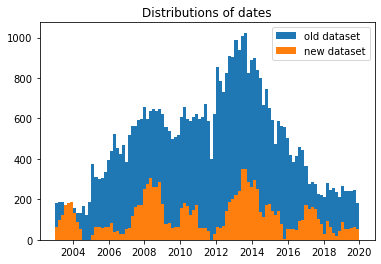

In [4]:
date_ranges = pd.read_csv('metadata/date_ranges_of_stations.csv', parse_dates=['start_date', 'end_date'], dayfirst=True)
date_ranges.head()

new_data = []

for c in cities:
    sd = date_ranges.start_date.loc[date_ranges.station == c].iloc[0]
    ed = date_ranges.end_date.loc[date_ranges.station == c].iloc[0]
    c_data = data.loc[data.station == c]
    c_data = c_data.loc[c_data.date >= sd]
    c_data = c_data.loc[c_data.date <= ed]
    new_data.append(c_data)

new_data = pd.concat(new_data)
new_data = new_data.reset_index(drop=True)

plt.hist(data.date, bins=100, label='old dataset')
plt.hist(new_data.date, bins=100, label='new dataset')
plt.title('Distributions of dates')
plt.legend()

data = new_data

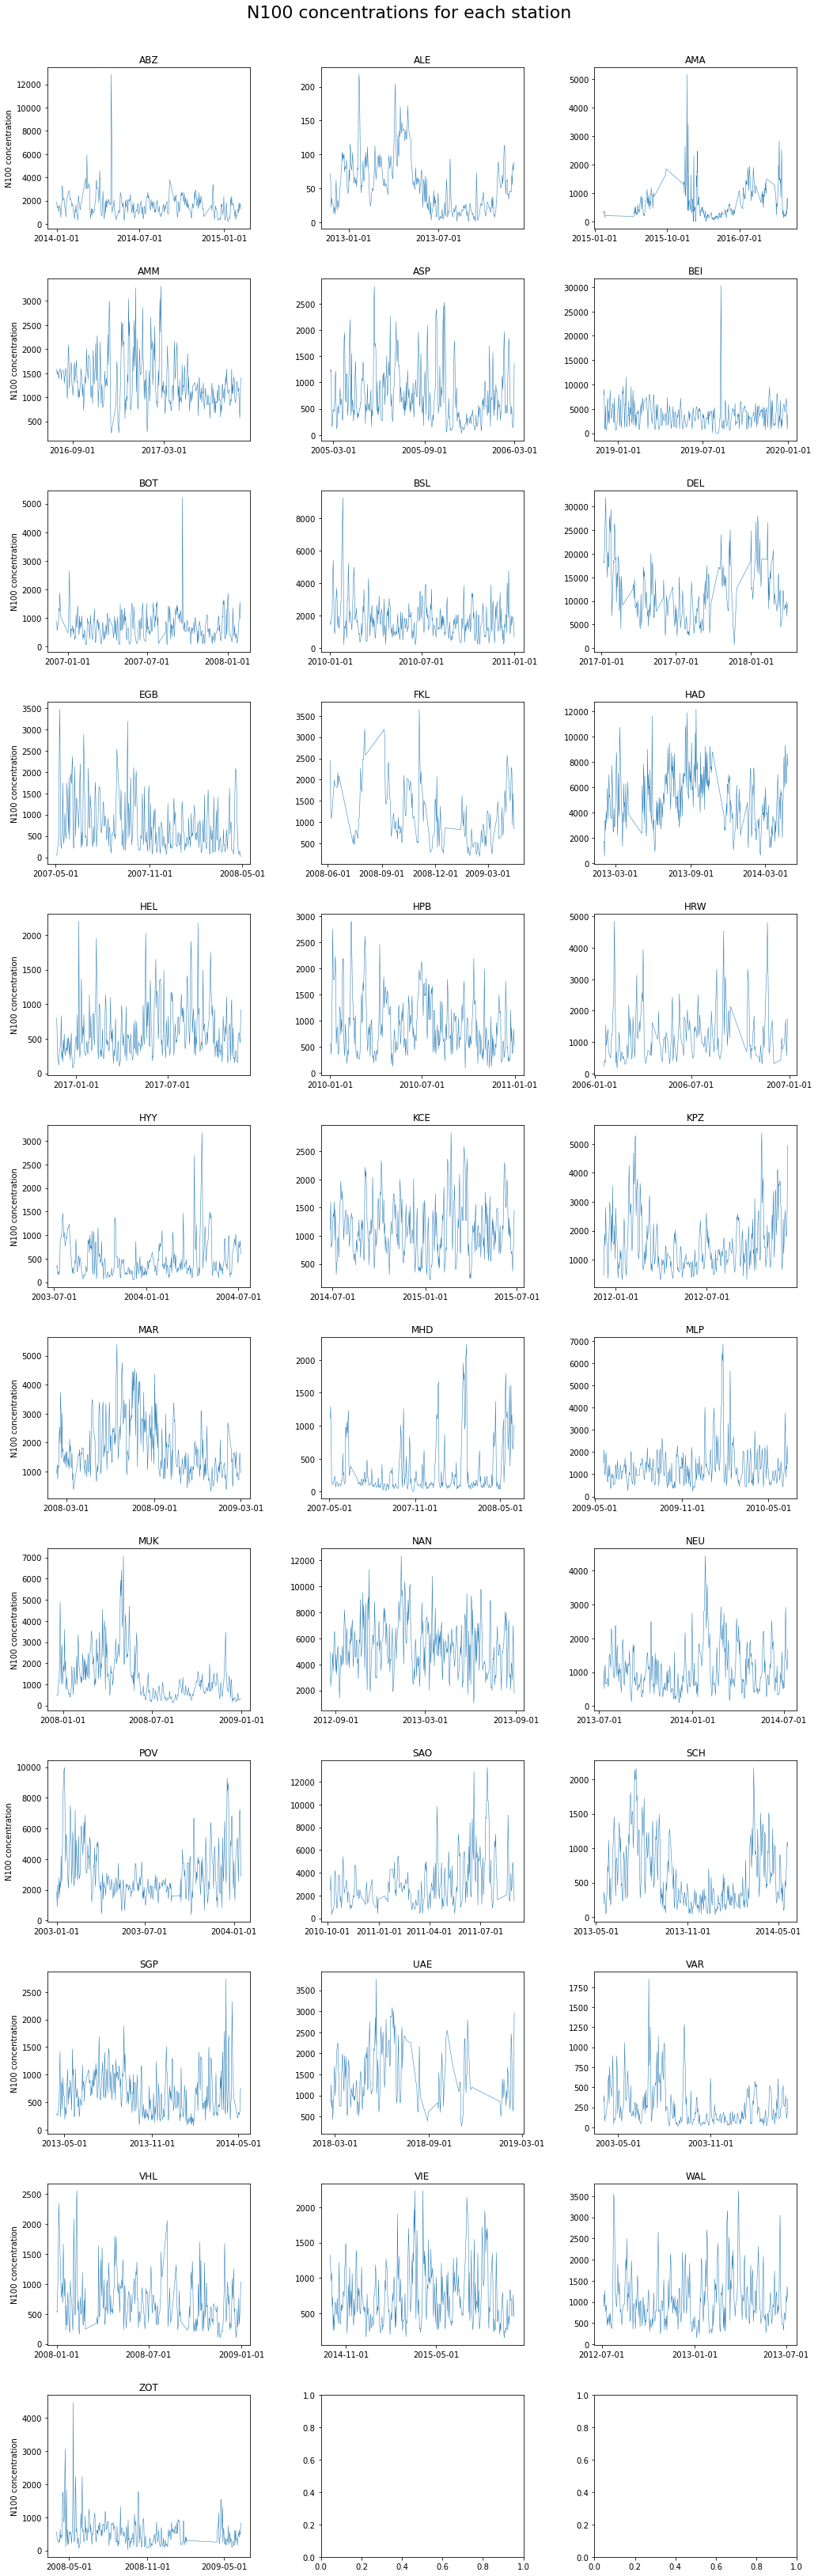

In [5]:
fig, axes = plt.subplots(12, 3, figsize=(15,45))
axes = iter(axes)
i = 0

for c in cities:
    if i%3 == 0:
        axis = next(axes)
    ax = axis[i%3]
    ax.plot(data.date.loc[data.station == c], data.n100.loc[data.station == c], lw=0.5)
    ax.set_title(c)
    ax.set_xticks(ax.get_xticks()[::3])
    if i%3 == 0:
        ax.set_ylabel('N100 concentration')
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('N100 concentrations for each station', y=1.01, fontsize=22);

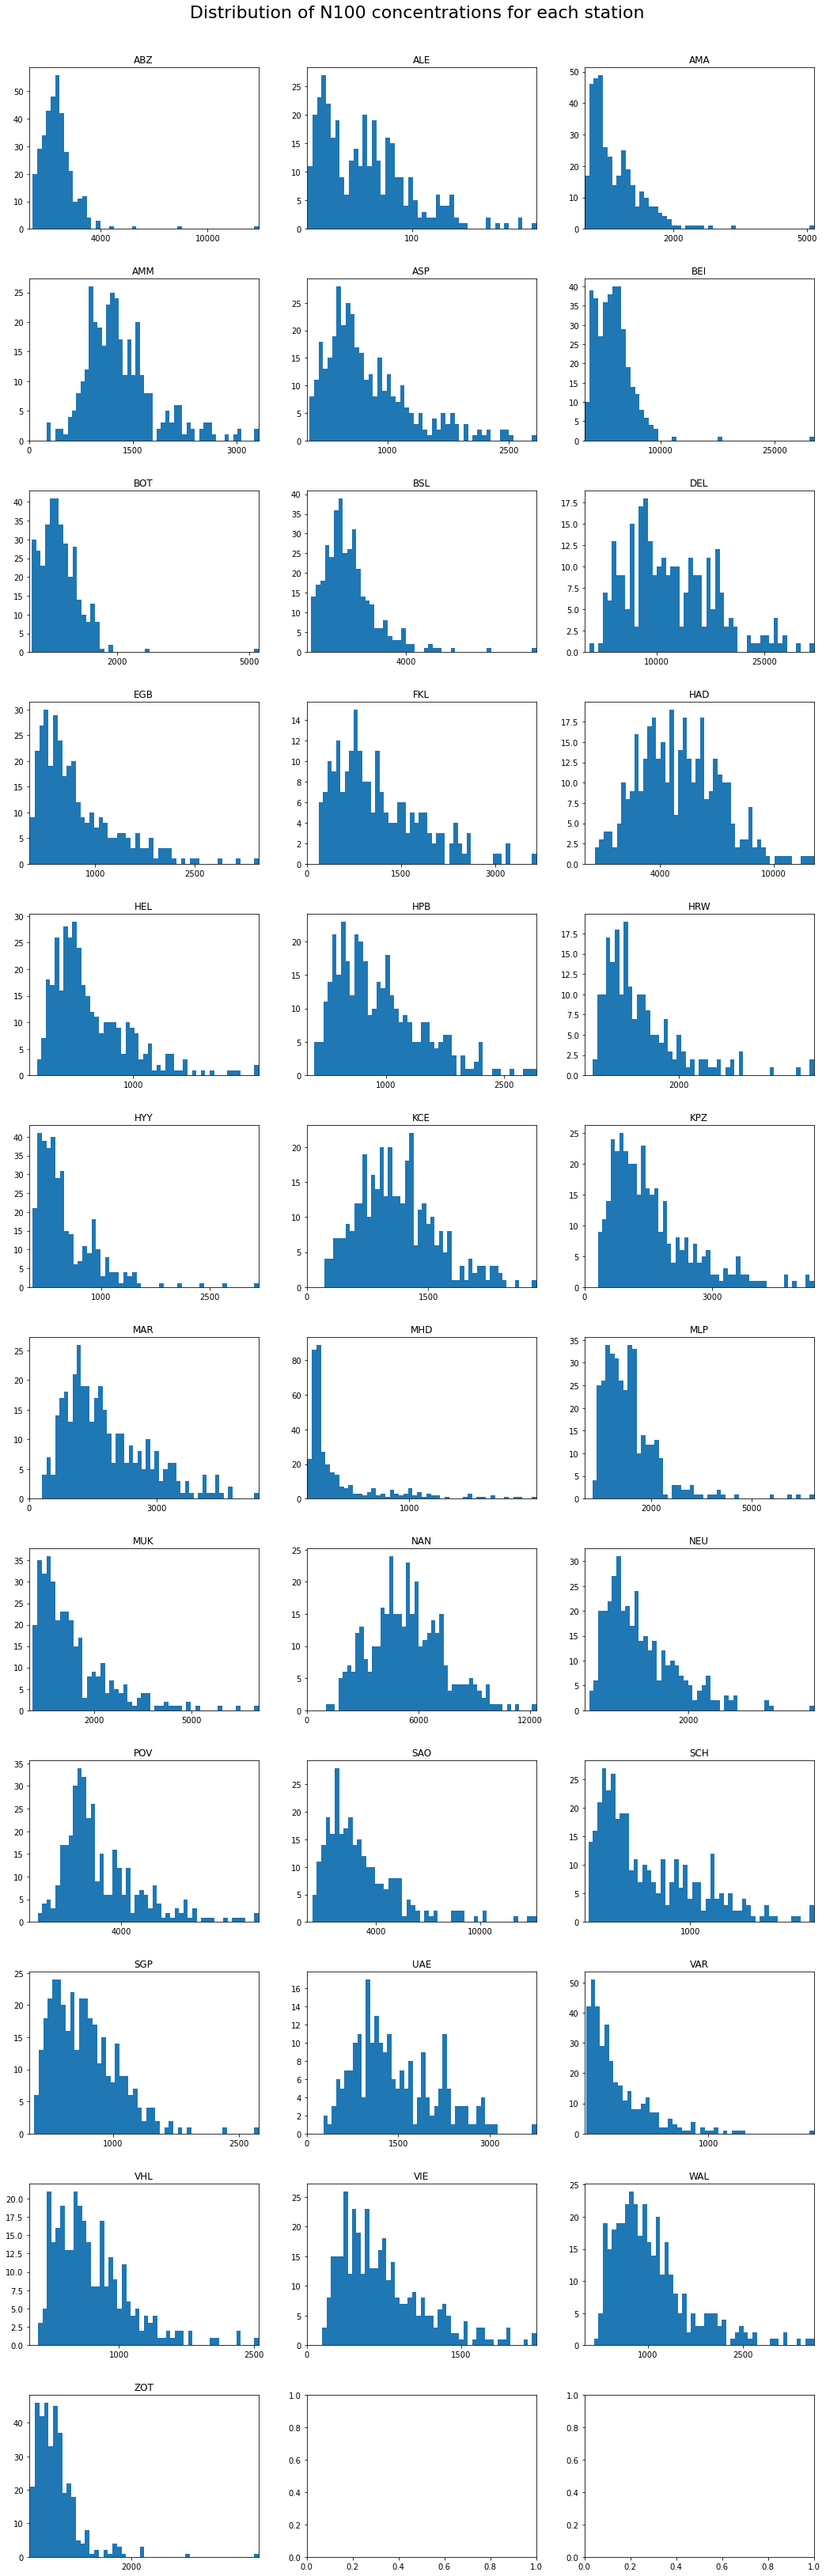

In [6]:
fig, axes = plt.subplots(12, 3, figsize=(15, 45))
axes = iter(axes)
i = 0

for c in cities:
    if i%3 == 0:
        axis = next(axes)
    ax = axis[i%3]
    ax.hist(data.n100.loc[data.station == c], bins=50)
    ax.set_title(c)
    ax.set_xticks(ax.get_xticks()[::3])
    ax.set_xlim(0, max(data.n100.loc[data.station == c]))
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('Distribution of N100 concentrations for each station', y=1.01, fontsize=22);

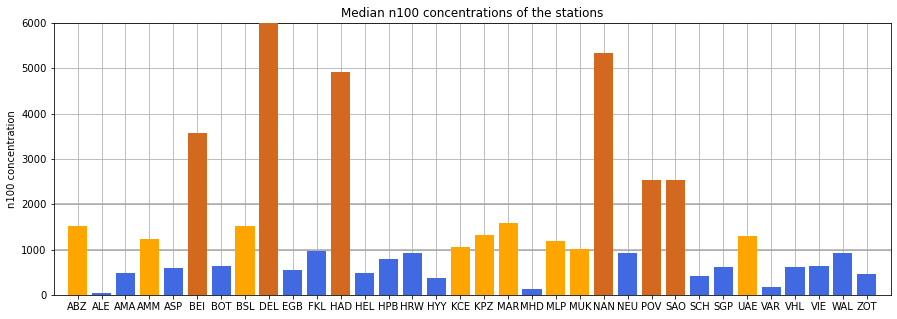

In [7]:
n100_medians = []

for s, group in data.groupby('station'):
    n100_medians.append(group.n100.median())
    
n100_medians_groups = np.where(np.array(n100_medians) > 1000, 'medium', 'low')
n100_medians_groups = np.where(np.array(n100_medians) > 2000, 'high', n100_medians_groups)

n100_medians_colors = list(map(lambda x: {'high':'chocolate', 'medium':'orange', 'low':'royalblue'}[x], 
                             n100_medians_groups))

plt.figure(figsize=(15,5))
plt.bar(cities, n100_medians, zorder=3, color=n100_medians_colors)
plt.grid(zorder=1)
plt.hlines([1000, 2000], xmin=-2, xmax=len(cities)+1, zorder=2, color='darkgrey')
plt.title('Median n100 concentrations of the stations')
plt.ylabel('n100 concentration')
plt.ylim(0, 6000)
plt.xlim(-1, len(cities));

In [8]:
variable_dict = {'n100': 'N100 concentration',
                 'aermr01': 'Sea salt aerosol (0.03 - 0.5 µm)\nmixing ratio',
                 'aermr02': 'Sea salt aerosol (0.5 - 5 µm)\nmixing ratio',
                 'aermr03': 'Sea salt aerosol (5 - 20 µm)\nmixing ratio',
                 'aermr04': 'Dust aerosol (0.03 - 0.55 µm)\nmixing ratio',
                 'aermr05': 'Dust aerosol (0.55 - 0.9 µm)\nmixing ratio',
                 'aermr06': 'Dust aerosol (0.9 - 20 µm)\nmixing ratio',
                 'aermr07': 'Hydrophilic organic matter\naerosol mixing ratio',
                 'aermr08': 'Hydrophobic organic matter\naerosol mixing ratio',                 
                 'aermr09': 'Hydrophilic black carbon\naerosol mixing ratio',
                 'aermr10': 'Hydrophobic black carbon\naerosol mixing ratio',
                 'co': 'Carbon monoxide',
                 'c5h8': 'Isoprene',
                 'c10h16': 'Terpenes',
                 'nh3': 'Ammonia',
                 'no': 'Nitrogen monoxide',
                 'no2': 'Nitrogen dioxide',
                 'so2': 'Sulphur dioxide',
                 'd2m': 'Dew point temperature\nat 2m height',
                 't2m': 'Air temperature\nat 2m height',
                 'crwc': 'Specific rain water content',
                 'blh': 'Boundary layer height',
                 'rh': 'Relative humidity',
                 'doy_sin': 'Sine of the day of the year',
                 'doy_cos': 'Cosine of the day of the year',
                 'latitude': 'Latitude',
                 'longitude_sin': 'Sine of longitude',
                 'longitude_cos': 'Cosine of longitude'}

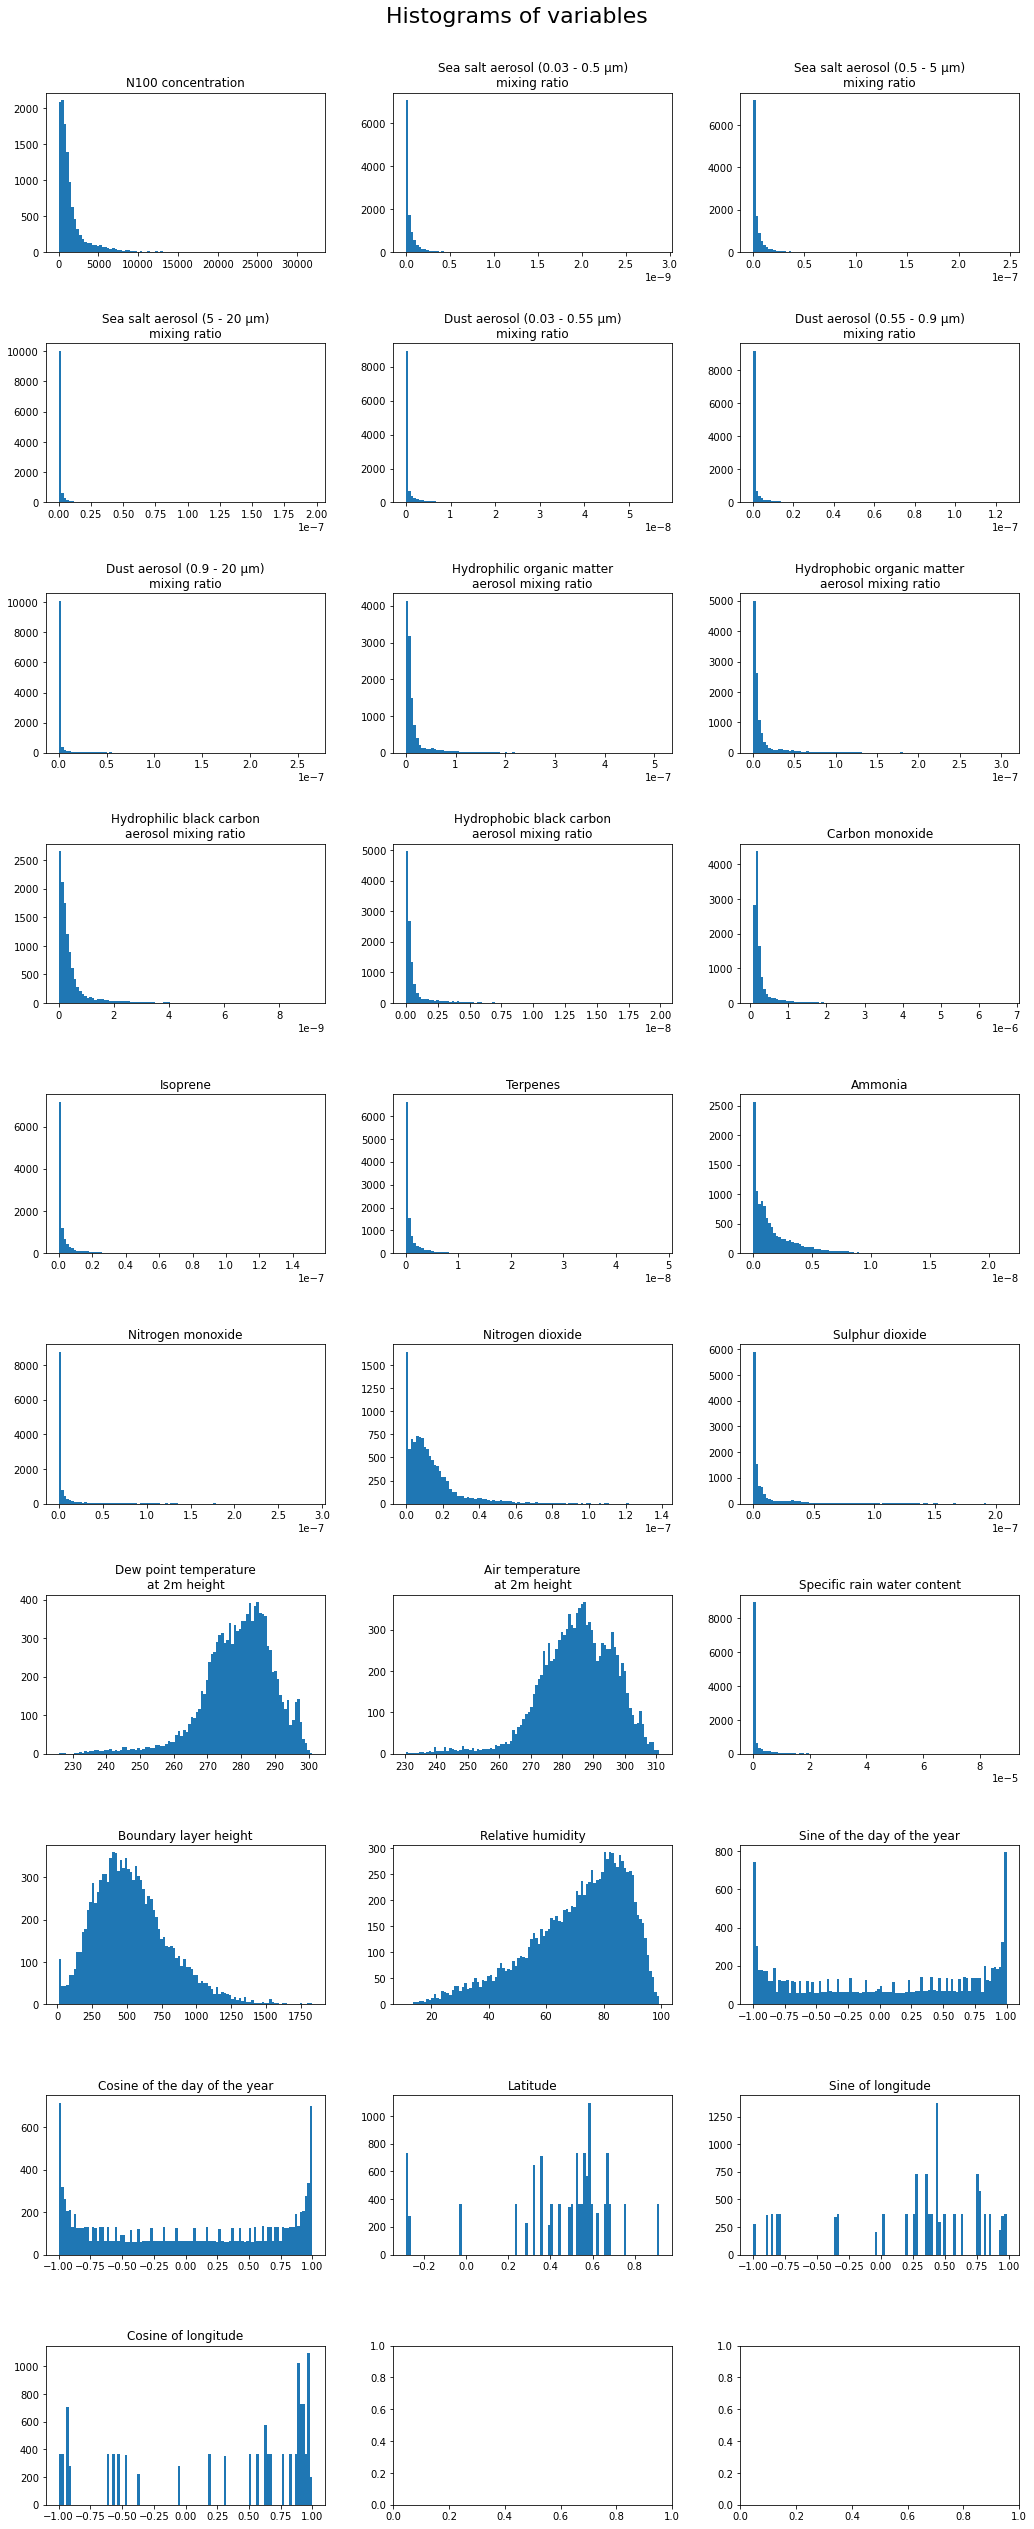

In [12]:
ncols = 3
fig, axes = plt.subplots(10, ncols, figsize=(15, 35))
axes = iter(axes)
i = 0

for v in ['n100']+variables:
    if i%ncols == 0:
        axis = next(axes)
    ax = axis[i%ncols]
    ax.hist(data[v], bins=100)
    ax.set_title(variable_dict[v])
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('Histograms of variables', y=1.01, fontsize=22);

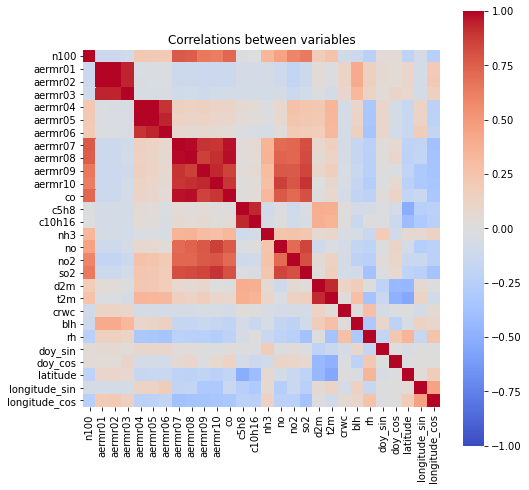

In [13]:
plt.figure(figsize=(8, 8))
sns.heatmap(data[['n100']+variables].corr(), 
            xticklabels=['n100']+variables, yticklabels=['n100']+variables, 
            cmap='coolwarm', cbar=True, square=True, vmin=-1, vmax=1)
plt.title('Correlations between variables');

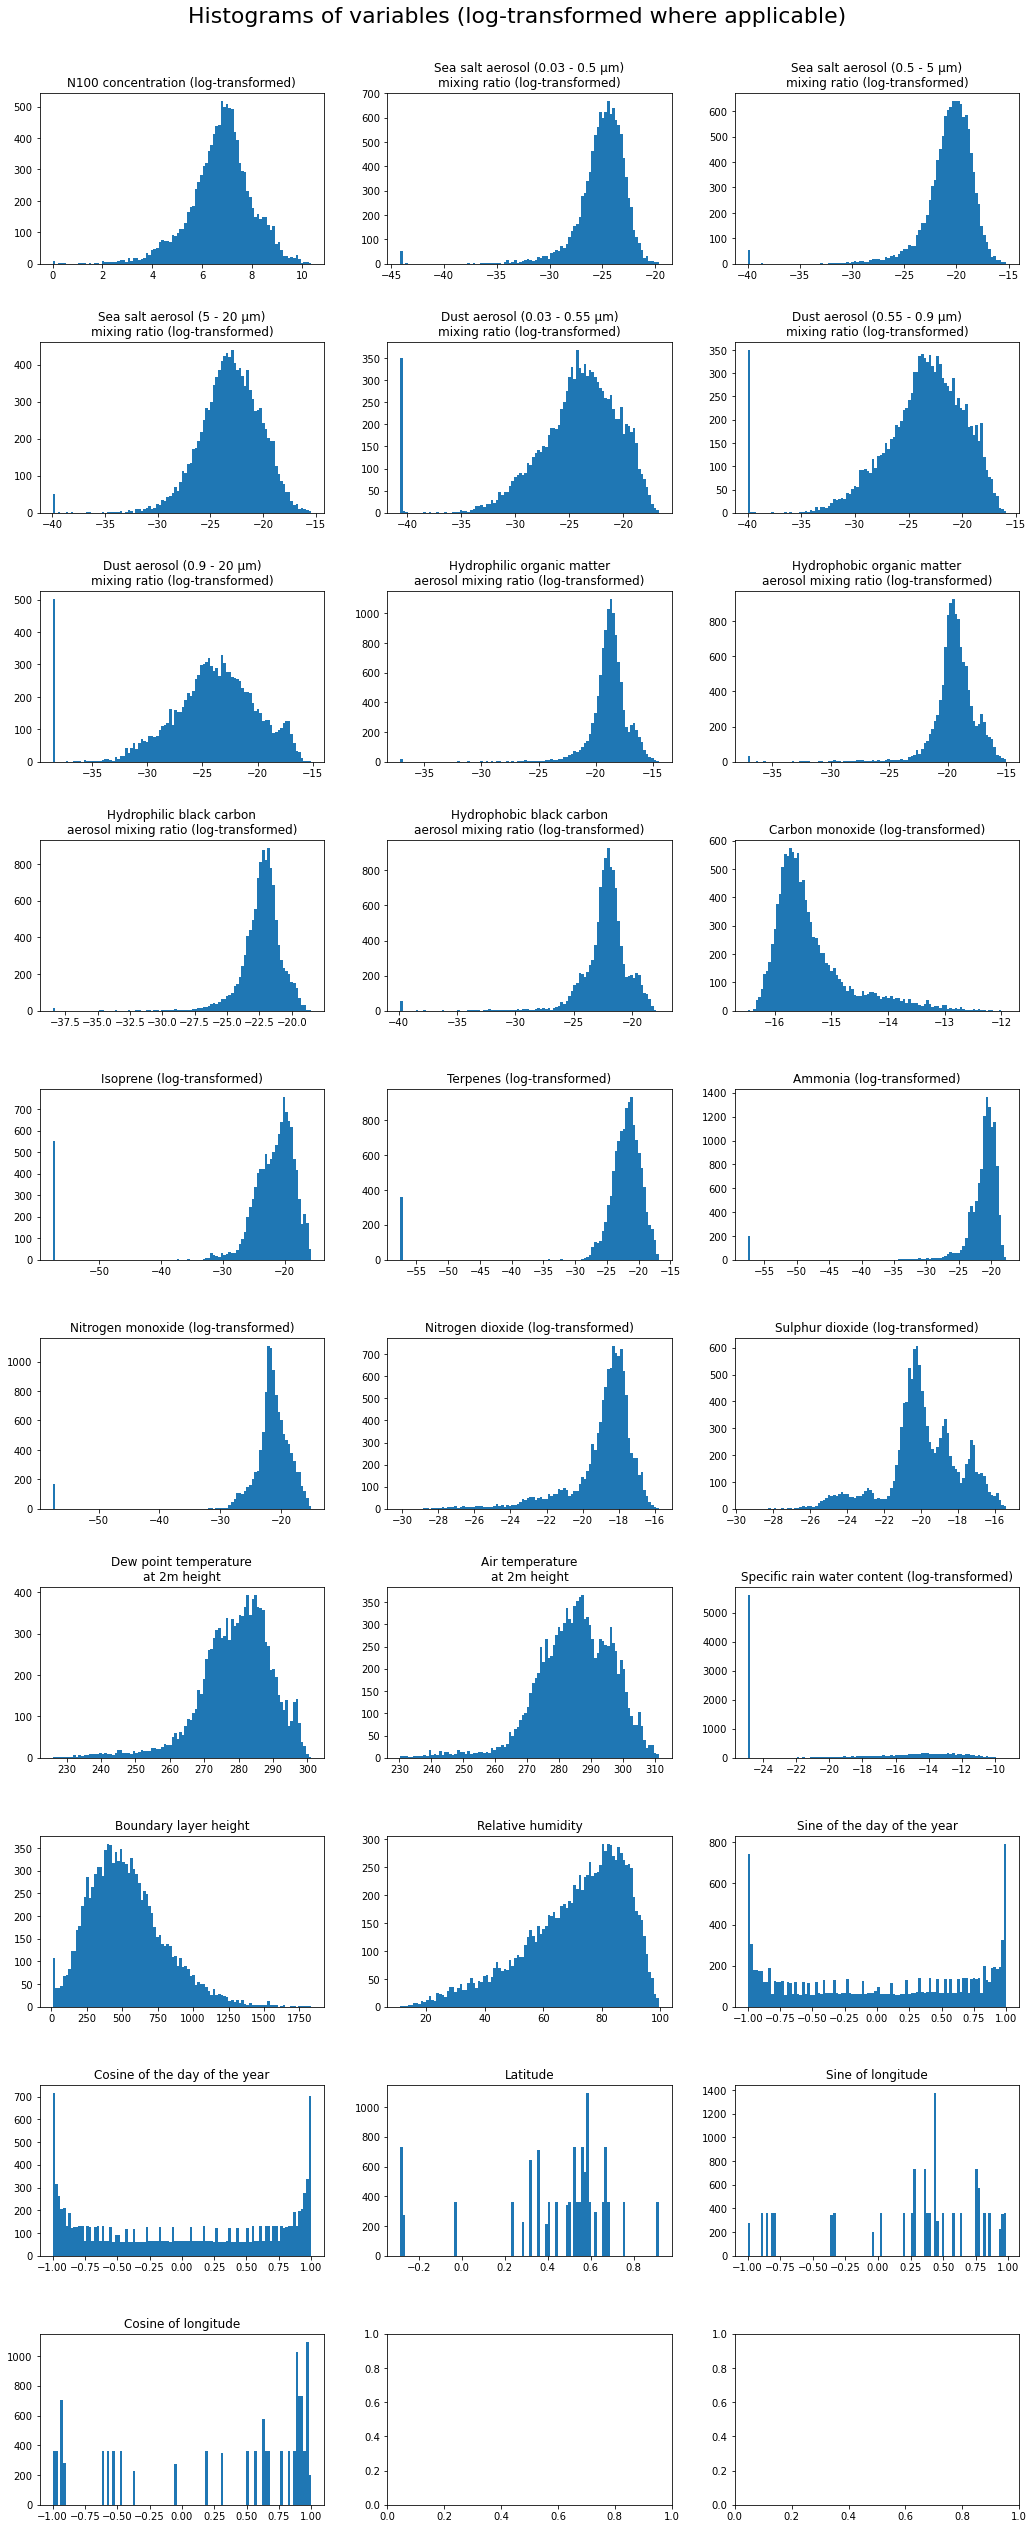

In [15]:
ncols = 3
fig, axes = plt.subplots(10, ncols, figsize=(15, 35))
axes = iter(axes)
i = 0

for v in ['n100_log']+transf_vars:
    if i%ncols == 0:
        axis = next(axes)
    ax = axis[i%ncols]
    ax.hist(data[v], bins=100)
    if v[-3:] == 'log':
        ax.set_title(variable_dict[v[:-4]] +' (log-transformed)')
    else:
        ax.set_title(variable_dict[v])
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('Histograms of variables (log-transformed where applicable)', y=1.01, fontsize=22);

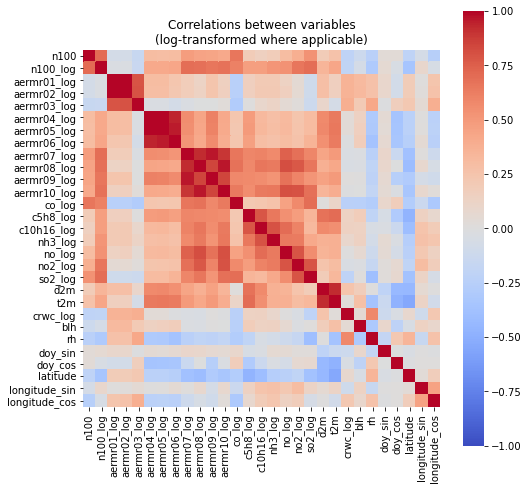

In [18]:
plt.figure(figsize=(8, 8))        
sns.heatmap(data[['n100', 'n100_log']+transf_vars].corr(), 
            xticklabels=['n100', 'n100_log']+transf_vars, yticklabels=['n100', 'n100_log']+transf_vars, 
            cmap='coolwarm', cbar=True, square=True, vmin=-1, vmax=1)
plt.title('Correlations between variables\n(log-transformed where applicable)');

In [19]:
print('Strongest correlations of variables with N100 (before and after log-transforming):')

for v in variables:
    corr = np.round(pearsonr(data[v], data.n100), 3)
    extra_space = int(corr[0] >= 0)
    offset = 14 - len(v) + extra_space
    
    if v+'_log' in data.columns:
        transf_corr = np.round(pearsonr(data[v+'_log'], data.n100), 3)
        if np.abs(transf_corr[0]) > np.abs(corr[0]):
            print(v, ' '*offset, corr[0], '\t', ' '*extra_space, transf_corr[0], 
                  ' \tcorr higher with transformed data')
        else:
            print(v, ' '*offset, corr[0], '\t', ' '*extra_space, transf_corr[0])
    else:
        print(v, ' '*offset, corr[0])

Strongest correlations of variables with N100 (before and after log-transforming):
aermr01         -0.128 	  -0.074
aermr02         -0.129 	  -0.077
aermr03         -0.099 	  -0.152  	corr higher with transformed data
aermr04          0.225 	   0.298  	corr higher with transformed data
aermr05          0.212 	   0.293  	corr higher with transformed data
aermr06          0.199 	   0.304  	corr higher with transformed data
aermr07          0.773 	   0.478
aermr08          0.764 	   0.452
aermr09          0.652 	   0.443
aermr10          0.628 	   0.421
co               0.724 	   0.662
c5h8            -0.01 	  0.192  	corr higher with transformed data
c10h16          -0.004 	  0.154  	corr higher with transformed data
nh3              0.336 	   0.185
no               0.461 	   0.303
no2              0.599 	   0.387
so2              0.641 	   0.538
d2m              0.188
t2m              0.264
crwc            -0.09 	  -0.205  	corr higher with transformed data
blh             -0.117
rh    

In [20]:
print('Strongest correlations of variables with log-transformed N100 (before and after log-transforming):')

for v in variables:
    corr = np.round(pearsonr(data[v], data.n100_log), 3)
    extra_space = int(corr[0] >= 0)
    offset = 14 - len(v) + extra_space
    
    if v+'_log' in data.columns:
        transf_corr = np.round(pearsonr(data[v+'_log'], data.n100_log), 3)
        if np.abs(transf_corr[0]) > np.abs(corr[0]):
            print(v, ' '*offset, corr[0], '\t', ' '*extra_space, transf_corr[0], 
                  ' \tcorr higher with transformed data')
        else:
            print(v, ' '*offset, corr[0], '\t', ' '*extra_space, transf_corr[0])
    else:
        print(v, ' '*offset, corr[0])

Strongest correlations of variables with log-transformed N100 (before and after log-transforming):
aermr01         -0.217 	  -0.025
aermr02         -0.219 	  -0.025
aermr03         -0.202 	  -0.147
aermr04          0.242 	   0.421  	corr higher with transformed data
aermr05          0.235 	   0.42  	corr higher with transformed data
aermr06          0.227 	   0.431  	corr higher with transformed data
aermr07          0.513 	   0.689  	corr higher with transformed data
aermr08          0.498 	   0.684  	corr higher with transformed data
aermr09          0.527 	   0.662  	corr higher with transformed data
aermr10          0.488 	   0.678  	corr higher with transformed data
co               0.47 	   0.612  	corr higher with transformed data
c5h8             0.019 	   0.476  	corr higher with transformed data
c10h16           0.029 	   0.476  	corr higher with transformed data
nh3              0.379 	   0.52  	corr higher with transformed data
no               0.36 	   0.538  	corr higher 